# Persiapan

## Menyiapkan library yang dibutuhkan

# Proyek Akhir: enyelesaikan Permasalahan Institusi Pendidikan

* Nama: Adib Ahmad Istiqlal
* Email: adibahmadistiqlal22@gmail.com
* Id Dicoding: sir_newton_turing

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

## Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv('dataset/data.csv', sep = ';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding


Pada data yang digunakan terdapat 37 features dengan 4424 data yang setiap features memiliki definisinya tersendiri. Definisi ini dapat dilihat pada point dibawah

| Nama Variabel                          | Deskripsi                                                                                                                                                                                                                                      |
|---------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                        | 1 - single, 2 - married, 3 - widower, 4 - divorced, 5 - facto union, 6 - legally separated                                                                                                            |
| Application mode                      | Mode pendaftaran siswa (berbagai aturan dan fase penerimaan berdasarkan situasi siswa, seperti jalur reguler, jalur internasional, perubahan kursus, dll.)                                            |
| Application order                     | Urutan pilihan aplikasi (0 - pilihan pertama; 9 - pilihan terakhir)                                                                                                                                   |
| Course                                | Kursus atau program studi yang dipilih oleh siswa (contoh: Teknik Informatika, Desain Komunikasi, Keperawatan, dll.)                                                                                   |
| Daytime/evening attendance            | Waktu kehadiran siswa (1 - daytime; 0 - evening)                                                                                                                                                       |
| Previous qualification                | Kualifikasi akademik sebelumnya (contoh: pendidikan dasar, menengah, diploma, gelar sarjana, dll.)                                                                                                   |
| Previous qualification (grade)       | Nilai kualifikasi akademik sebelumnya (antara 0 hingga 200)                                                                                                                                           |
| Nationality                           | Kewarganegaraan siswa (contoh: 1 - Portuguese, 6 - Spanish, 41 - Brazilian, dll.)                                                                                                                     |
| Mother's qualification                | Tingkat pendidikan ibu siswa (contoh: 1 - Secondary Education, 3 - Higher Education - Degree, 5 - Doctorate, dll.)                                                                                  |
| Father's qualification                | Tingkat pendidikan ayah siswa (contoh: 1 - Secondary Education, 3 - Higher Education - Degree, 5 - Doctorate, dll.)                                                                                  |
| Mother's occupation                   | Pekerjaan ibu siswa (contoh: 0 - Student, 3 - Intermediate Level Technicians and Professions, 5 - Personal Services, Security and Safety Workers and Sellers, dll.)                                   |
| Father's occupation                   | Pekerjaan ayah siswa (contoh: 0 - Student, 3 - Intermediate Level Technicians and Professions, 5 - Personal Services, Security and Safety Workers and Sellers, dll.)                                  |
| Admission grade                       | Nilai masuk siswa (antara 0 hingga 200)                                                                                                                                                              |
| Displaced                             | Apakah siswa pindah tempat tinggal untuk studi (1 - yes; 0 - no)                                                                                                                                      |
| Educational special needs             | Apakah siswa memiliki kebutuhan pendidikan khusus (1 - yes; 0 - no)                                                                                                                                  |
| Debtor                                | Apakah siswa memiliki tunggakan pembayaran (1 - yes; 0 - no)                                                                                                                                        |
| Tuition fees up to date               | Apakah siswa telah melunasi biaya kuliah (1 - yes; 0 - no)                                                                                                                                          |
| Gender                                | Jenis kelamin siswa (1 - male; 0 - female)                                                                                                                                                          |
| Scholarship holder                    | Apakah siswa menerima beasiswa (1 - yes; 0 - no)                                                                                                                                                    |
| Age at enrollment                     | Usia siswa pada saat pendaftaran                                                                                                                                                                    |
| International                         | Apakah siswa berasal dari luar negeri (1 - yes; 0 - no)                                                                                                                                            |
| Curricular units 1st sem (credited)   | Jumlah unit kurikulum yang diakui di semester pertama                                                                                                                                               |
| Curricular units 1st sem (enrolled)   | Jumlah unit kurikulum yang diikuti di semester pertama                                                                                                                                              |
| Curricular units 1st sem (evaluations)| Jumlah evaluasi pada unit kurikulum di semester pertama                                                                                                                                             |
| Curricular units 1st sem (approved)   | Jumlah unit kurikulum yang disetujui di semester pertama                                                                                                                                            |
| Curricular units 1st sem (grade)      | Nilai rata-rata di semester pertama (antara 0 hingga 20)                                                                                                                                            |
| Curricular units 1st sem (without evaluations) | Jumlah unit kurikulum tanpa evaluasi di semester pertama                                                                                                                                         |
| Curricular units 2nd sem (credited)   | Jumlah unit kurikulum yang diakui di semester kedua                                                                                                                                                 |
| Curricular units 2nd sem (enrolled)   | Jumlah unit kurikulum yang diikuti di semester kedua                                                                                                                                                |
| Curricular units 2nd sem (evaluations)| Jumlah evaluasi pada unit kurikulum di semester kedua                                                                                                                                               |
| Curricular units 2nd sem (approved)   | Jumlah unit kurikulum yang disetujui di semester kedua                                                                                                                                              |
| Curricular units 2nd sem (grade)      | Nilai rata-rata di semester kedua (antara 0 hingga 20)                                                                                                                                             |
| Curricular units 2nd sem (without evaluations) | Jumlah unit kurikulum tanpa evaluasi di semester kedua                                                                                                                                         |
| Unemployment rate                     | Tingkat pengangguran (%)                                                                                                                                                                            |
| Inflation rate                        | Tingkat inflasi (%)                                                                                                                                                                                 |
| GDP                                   | Produk Domestik Bruto (PDB)                                                                                                                                                                         |
| Target                                | Target klasifikasi siswa (dropout, enrolled, atau graduate) di akhir durasi studi normal                                                                                                            |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.describe(include="object").T

,count,unique,top,freq
Status,4424,3,Graduate,2209


In [5]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


Pada data yang digunakna terdapat 3 kelas yang terdiri dari 3 kelas yaitu dropout, enrolled, and graduate. Namun permasalahan bisnis yang ingin diselesaikan ialah ingin mengetahui secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus. Oleh karena itu nantinya pada proses machine learning yang digunakan hanya berfokus terhadap 2 kelas yaitu dropout dan graduate. Sehingga analisis lebih mengkrucut

Selain itu statistik data tiap features numerik dan kategorik tidak memiliki missing values. Namun tahapan selanjutnya ingin melakukan hubungan feature dan seleski feature

In [6]:
df = df[(df['Status'] == "Graduate") | 
        (df['Status'] == "Dropout") ]
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.to_csv('dataset/data_manipulasi.csv')

## EDA

Pada proses ini akan memecah feature yang bersifat kontinus dan diskrit agar dikelompokkan saat memahami persebaran data

### Numerik Kontinus

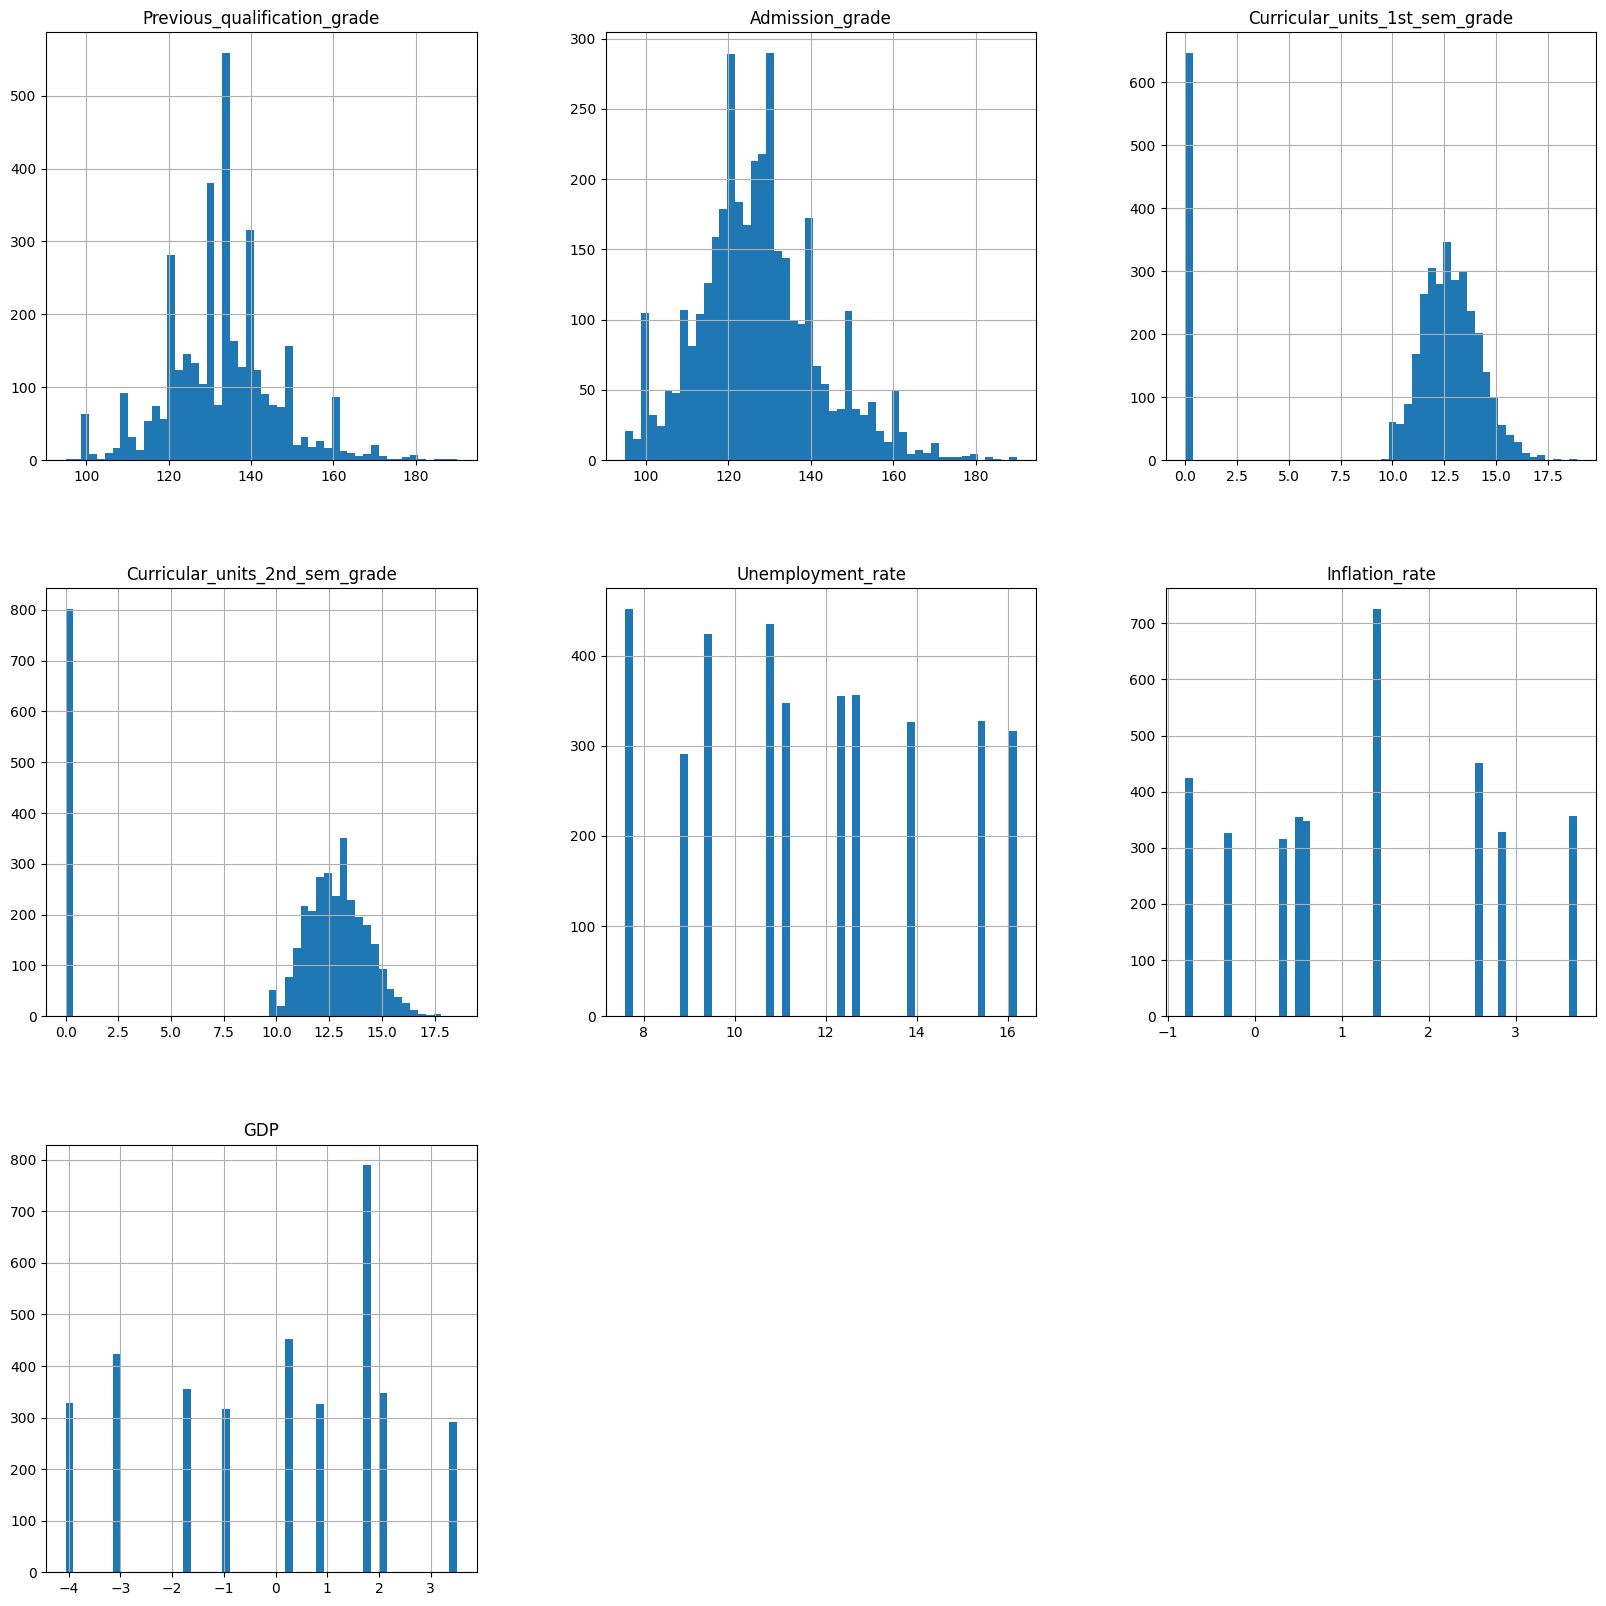

In [9]:
float_col = df.select_dtypes(include='float')

df[float_col.T.index].hist(bins = 50, figsize=(20,20))
plt.show()

Pada hasil mendapatkan informasi
* GDP memiliki nilai yang tidak wajar dimana nilai GDP dibawah 0
* Nilai pada semester 1 dan 2 memiliki jumlah nilai 0 (terburuk) paling tinggi. Hal ini mmembuktikan terdapat banyak siswa banyak yang gagal

### Numerik Diskrit

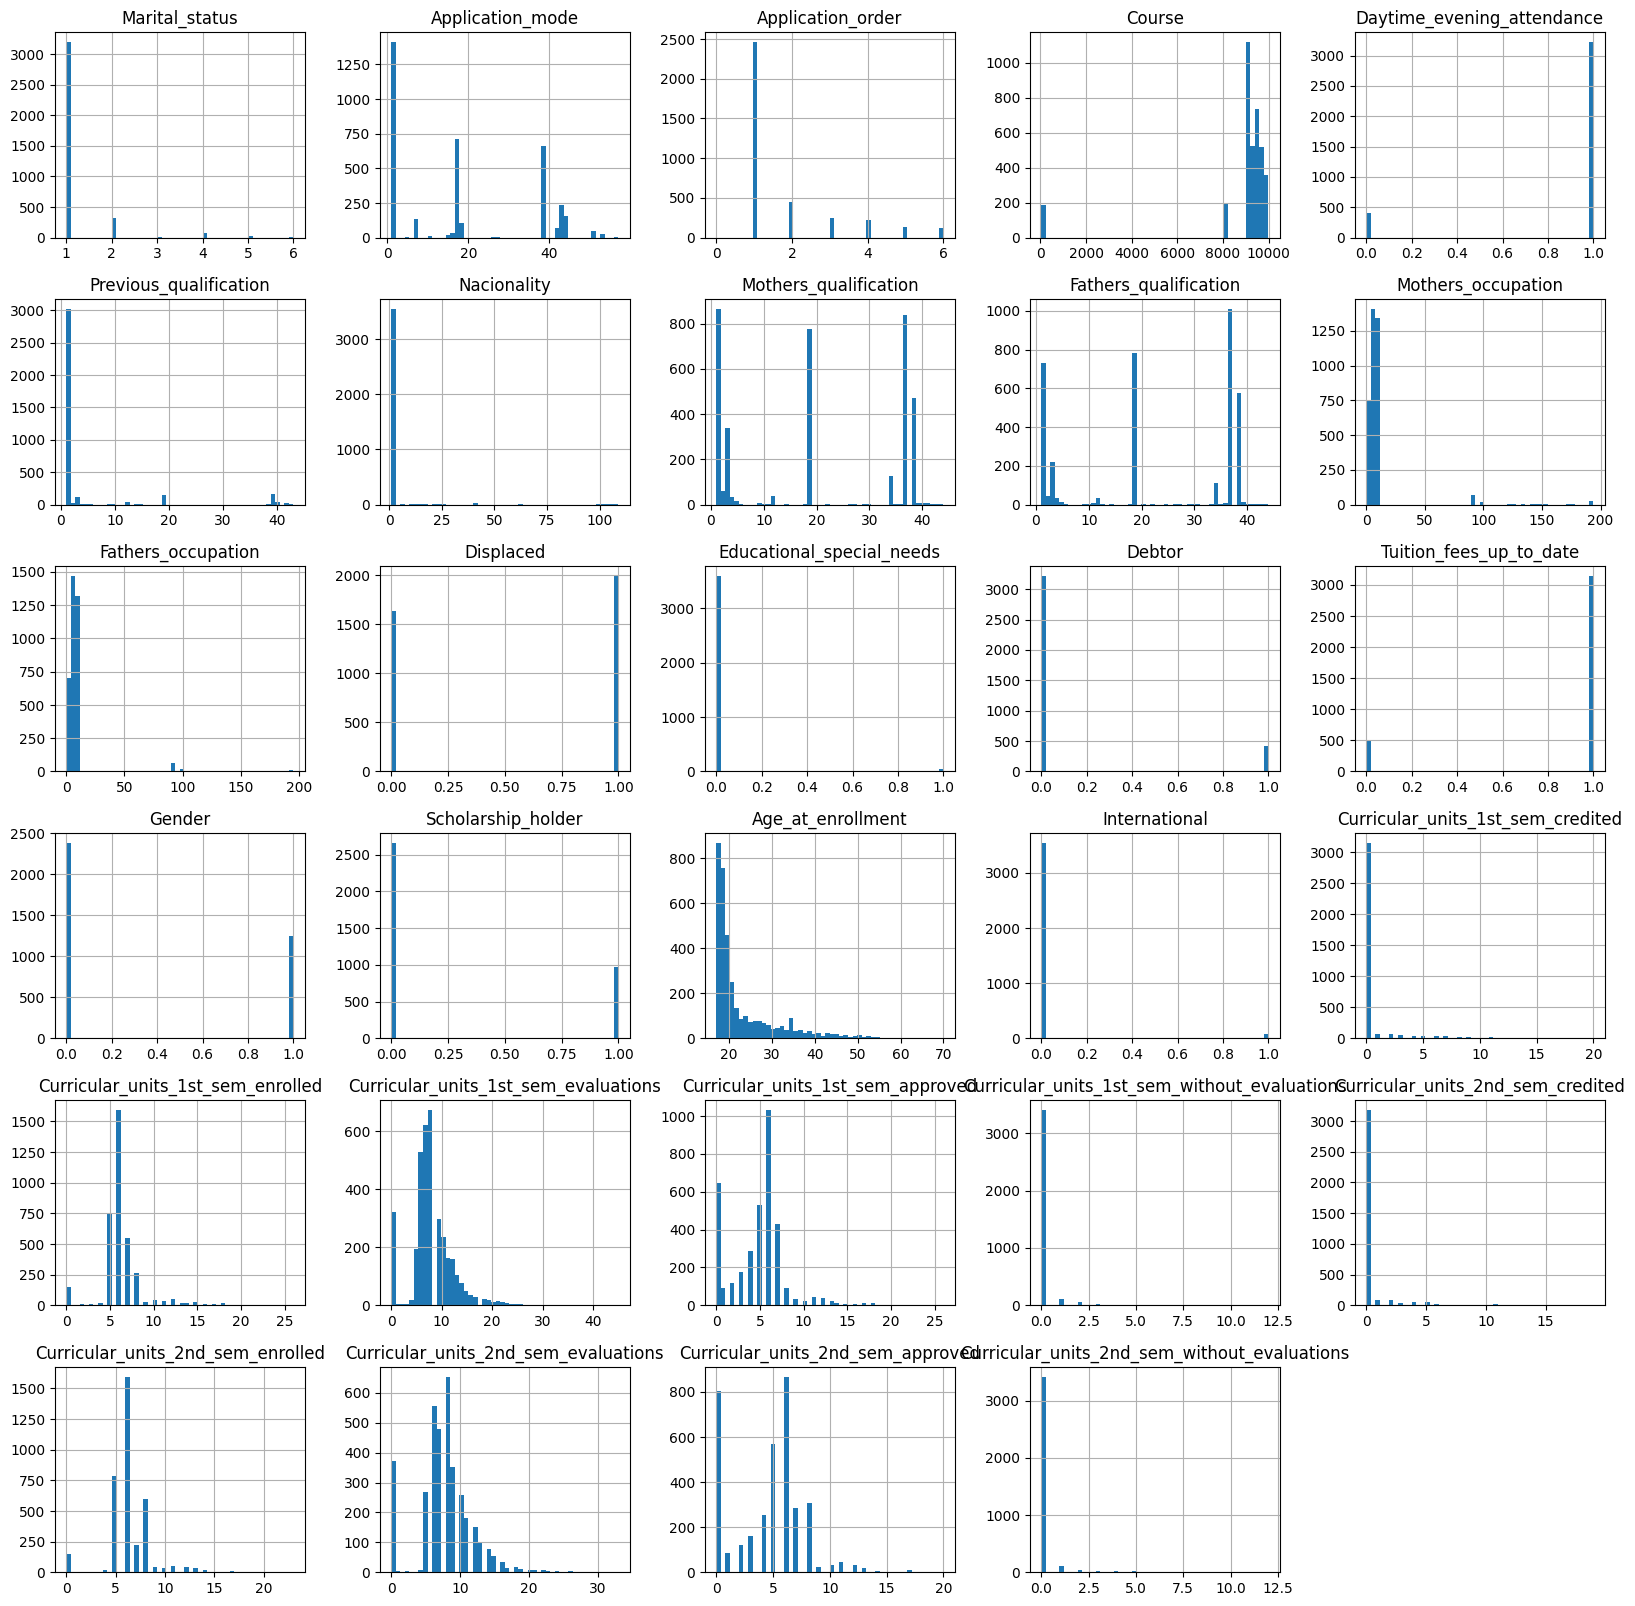

In [10]:
int_col = df.select_dtypes(include='integer')

df[int_col.T.index].hist(bins = 50, figsize=(20,20))
plt.show()

* Jumlah semester yang diikuti dari semester 1 dan semester 2 mengalami penurunan yang diambil Mahasiswa
* Proporsi perempuan lebih tinggi dibanding perempuan
* Penerima beasiswa lebih rendah dibanding yang tidak menerima beasiswa
* Hanya sebagai kecil mahaiswa yang berumur di atas 30 tahun dan paling banyak dibawah 20
* Umur ini searah dengan status perkawinan yang tertinggi dengan status single
* Pendidikan Ibu dan Ayah mahasiswa kebanyakan tidak diketahui dan lulusan dibawah SMA

Berdasarkan distribusi data di atas bisa dijadikan salah satu pemicu motivasi yang bisa diberikan instruktur (yang terutama pada pendidikan status orang tua, umur dan status perkawinan dan beasiswa) agar dapat memberikan semangat kepada mahasiswanya untuk dapat lulus lebih cepat 

## Distribusi Feature Kategorik

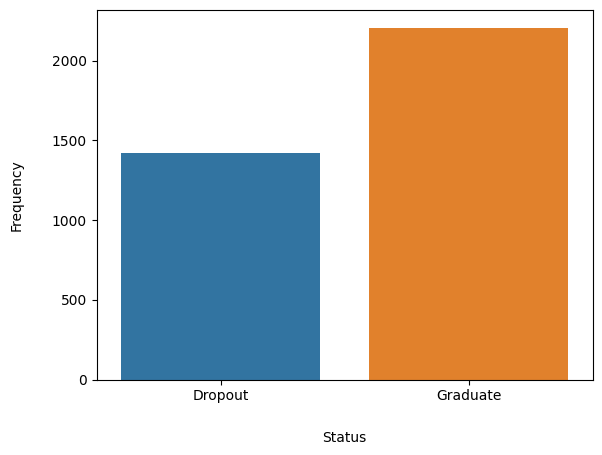

In [11]:
sns.countplot(data=df, x='Status', hue = 'Status')
plt.xlabel('Status', labelpad= 20)
plt.ylabel('Frequency', labelpad= 20)
plt.show()

Proporsi mahasiswa yang dropout memiliki proporsi yang hampir 50% dari total data. Informasi bisa ditelah dari analisis sebelumnya yaitu pendidikan status orang tua, umur dan status perkawinan

In [12]:
def categorical_plot(features, df, segment_feature=None):
    n_features = len(features)
    n_cols = 2 
    n_rows = (n_features + n_cols - 1) // n_cols 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, ax=axes[i], hue=feature)
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-45)
        else:
            sns.countplot(data=df, x=feature, ax=axes[i])
            axes[i].set_title(f'Distribution of {feature}')

    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_32148\1770818.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-45)
C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_32148\1770818.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-45)
C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_32148\1770818.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-45)
C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_32148\1770818.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[

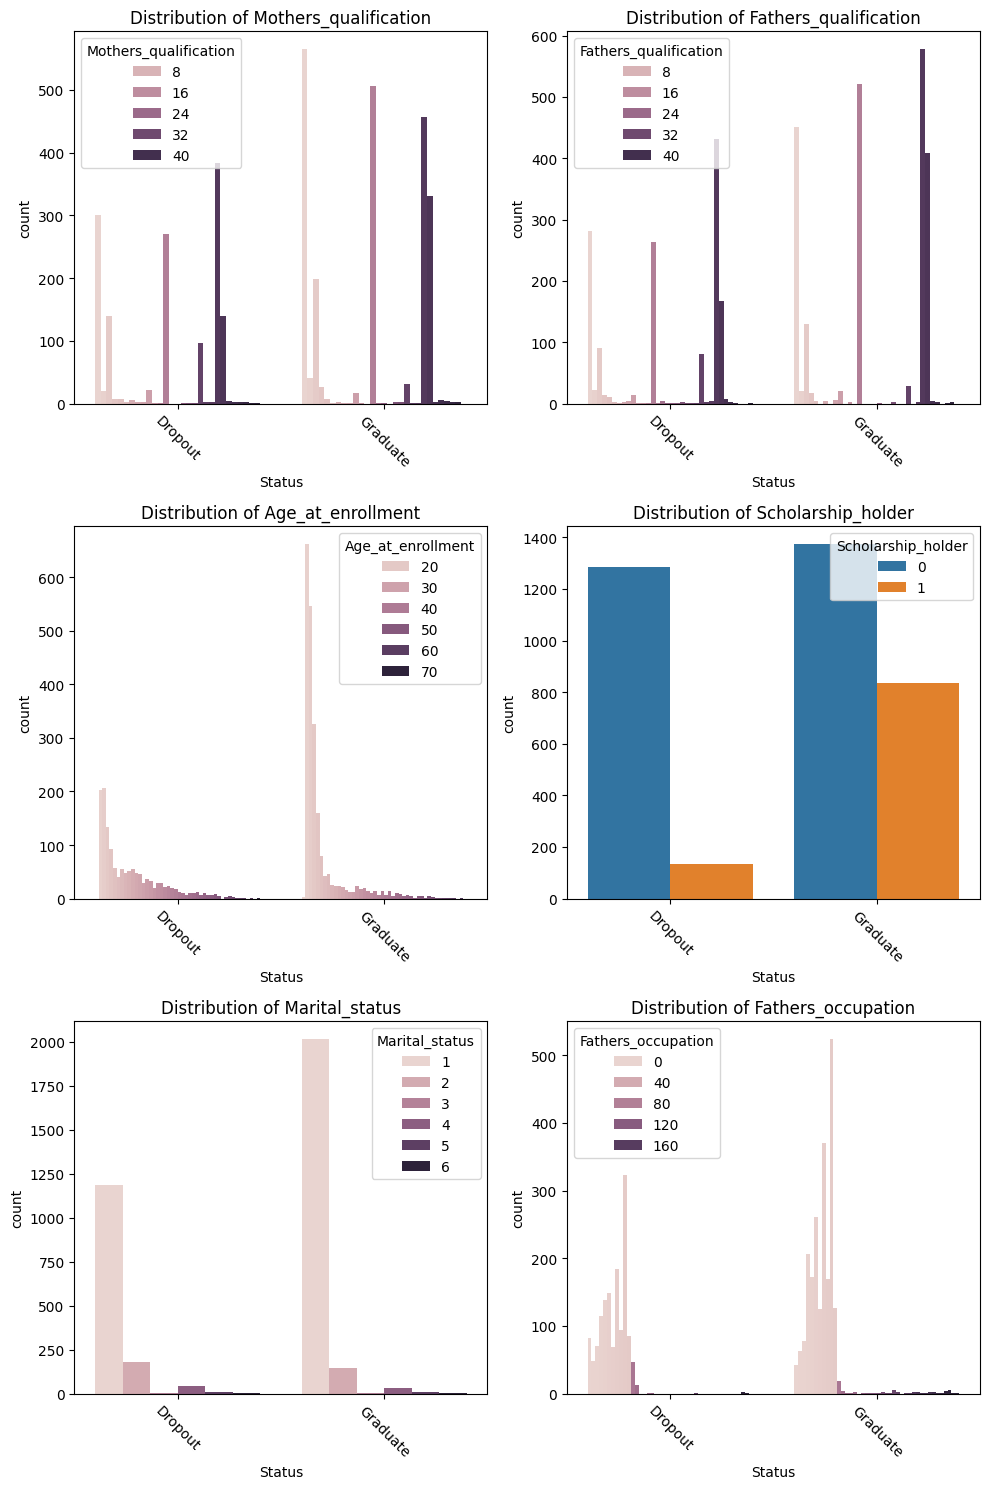

In [13]:
categorical_plot(
    features=["Mothers_qualification", "Fathers_qualification", "Age_at_enrollment", 
              "Scholarship_holder", "Marital_status", "Fathers_occupation"],
    df=df,
    segment_feature= 'Status'
)

Ternyata dari sisi pendidikan orang tua mahasiswa yang memiliki pendidikan lebih rendah memiliki motivasi lebih tinggi dibanding mahasiswa yang pendidikannya S1. Anehnya, Mahasiswa yang memiliki orang tua pendidikan S1 merupakan jumlah terbanyak yang berstatus dropout. Uniknya juga pekerjaan dari mahasiswa yang dropout maupun yang graduate orangnya tua sedang menempuh pendidikan. Lainnya, penerima beasiswa terdapat 100 orang yang memiliki status dropout.

Hasil ini memang membuktikan tidak adanya motivasi yang dimiliki mahasiswa dropout yang bisa menjadikan pilihan terbaik untuk memberikan motivasi oleh instruktur. Selanjutnya akan diliat bagaimana hubungan antar feature tersebut

## Pearson Correlation

Untuk menguji korelasi, akan dilakukan transformasi data sementara pada feature Target menjadi numerik dengan metode Encoder menggunakan for-if one line

In [14]:
df['Status_Numerik'] = [1 if i == "Graduate" else 0 for i in df['Status']]

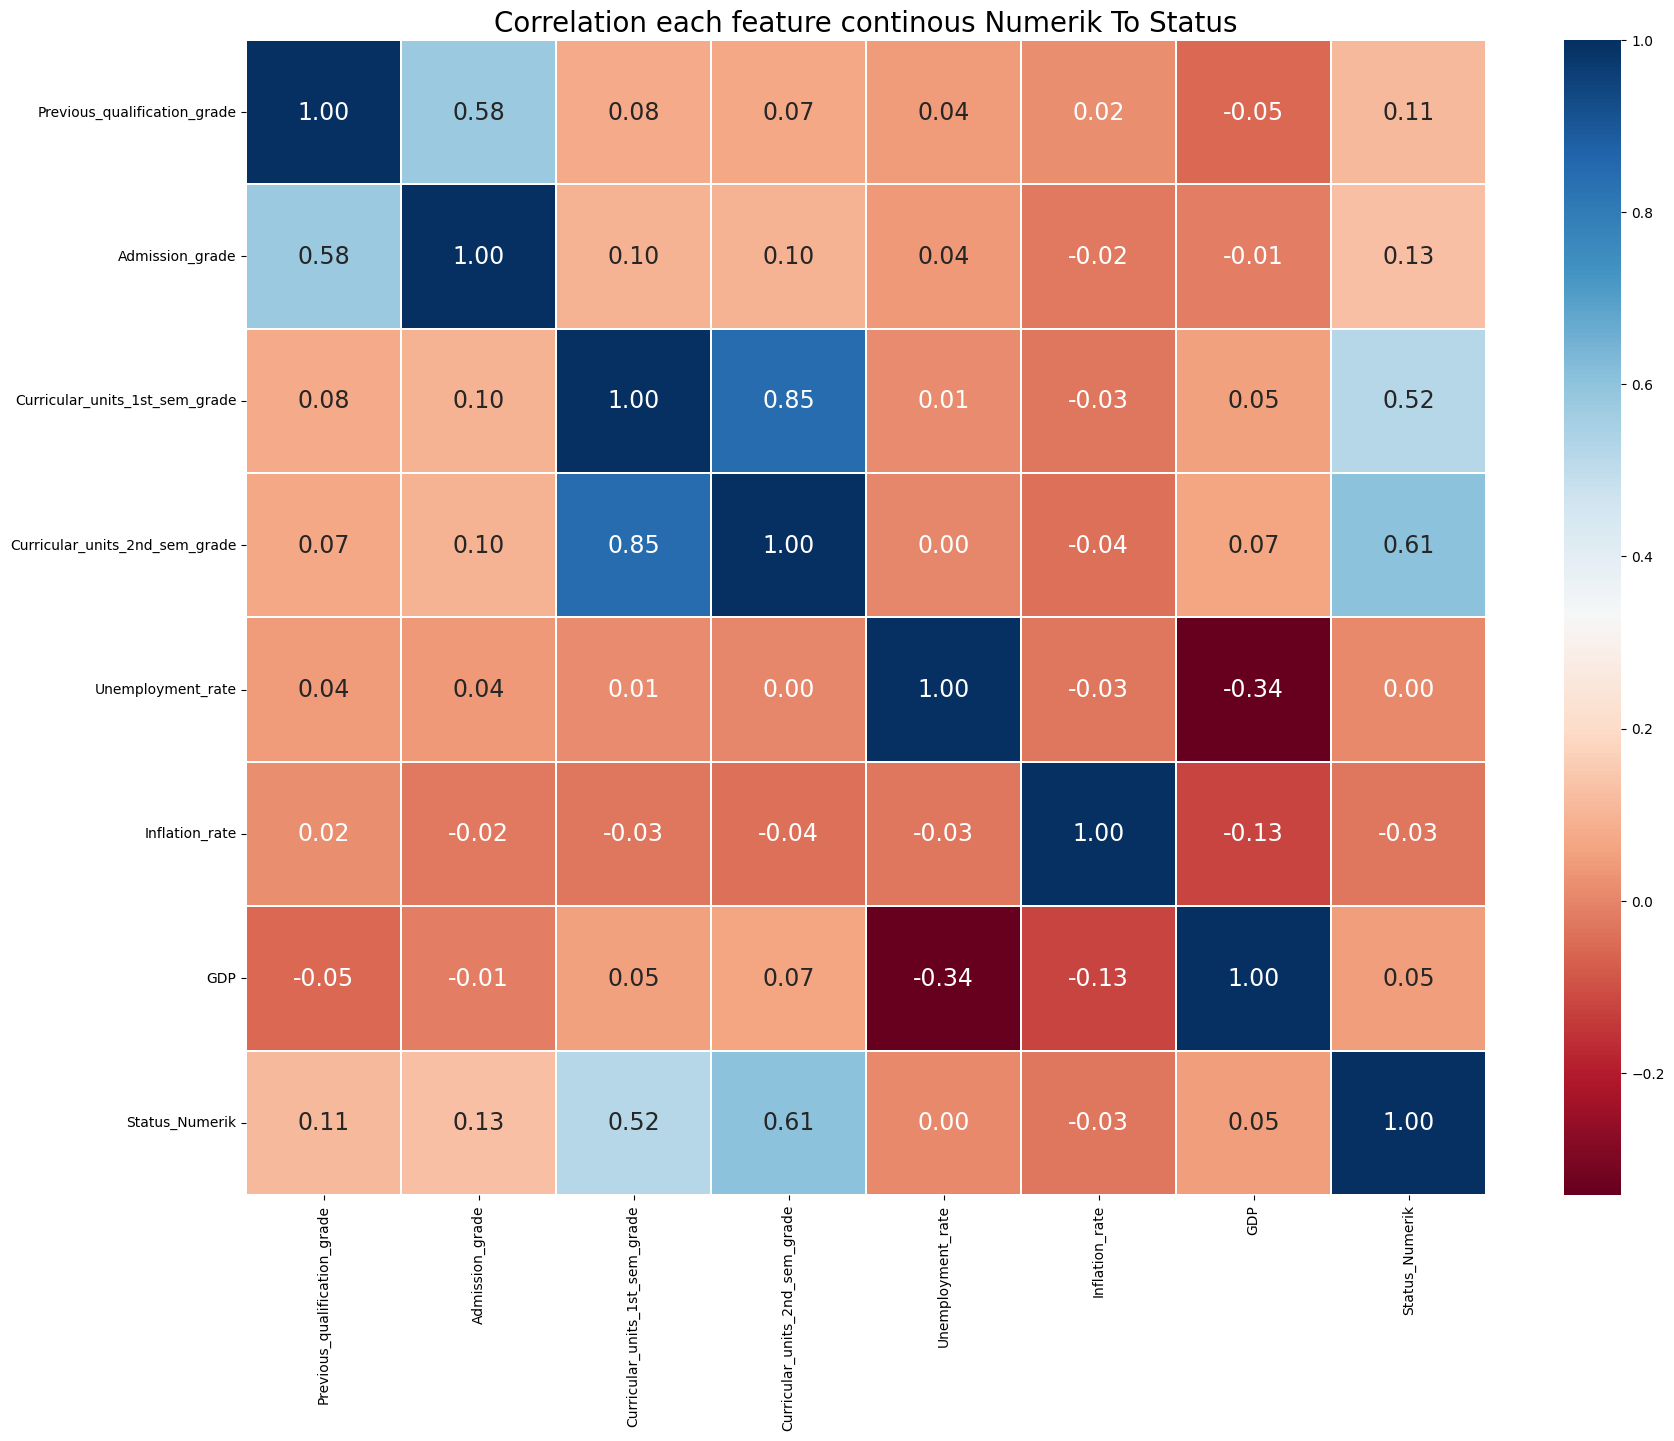

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df[['Previous_qualification_grade', 'Admission_grade',
       'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
       'Unemployment_rate', 'Inflation_rate', 'GDP', "Status_Numerik"]].corr(),
            annot = True, annot_kws = {'fontsize':17}, cmap = 'RdBu', linewidth = 0.3, fmt='.2f')
plt.title('Correlation each feature continous Numerik To Status', fontsize = 20)
plt.show()

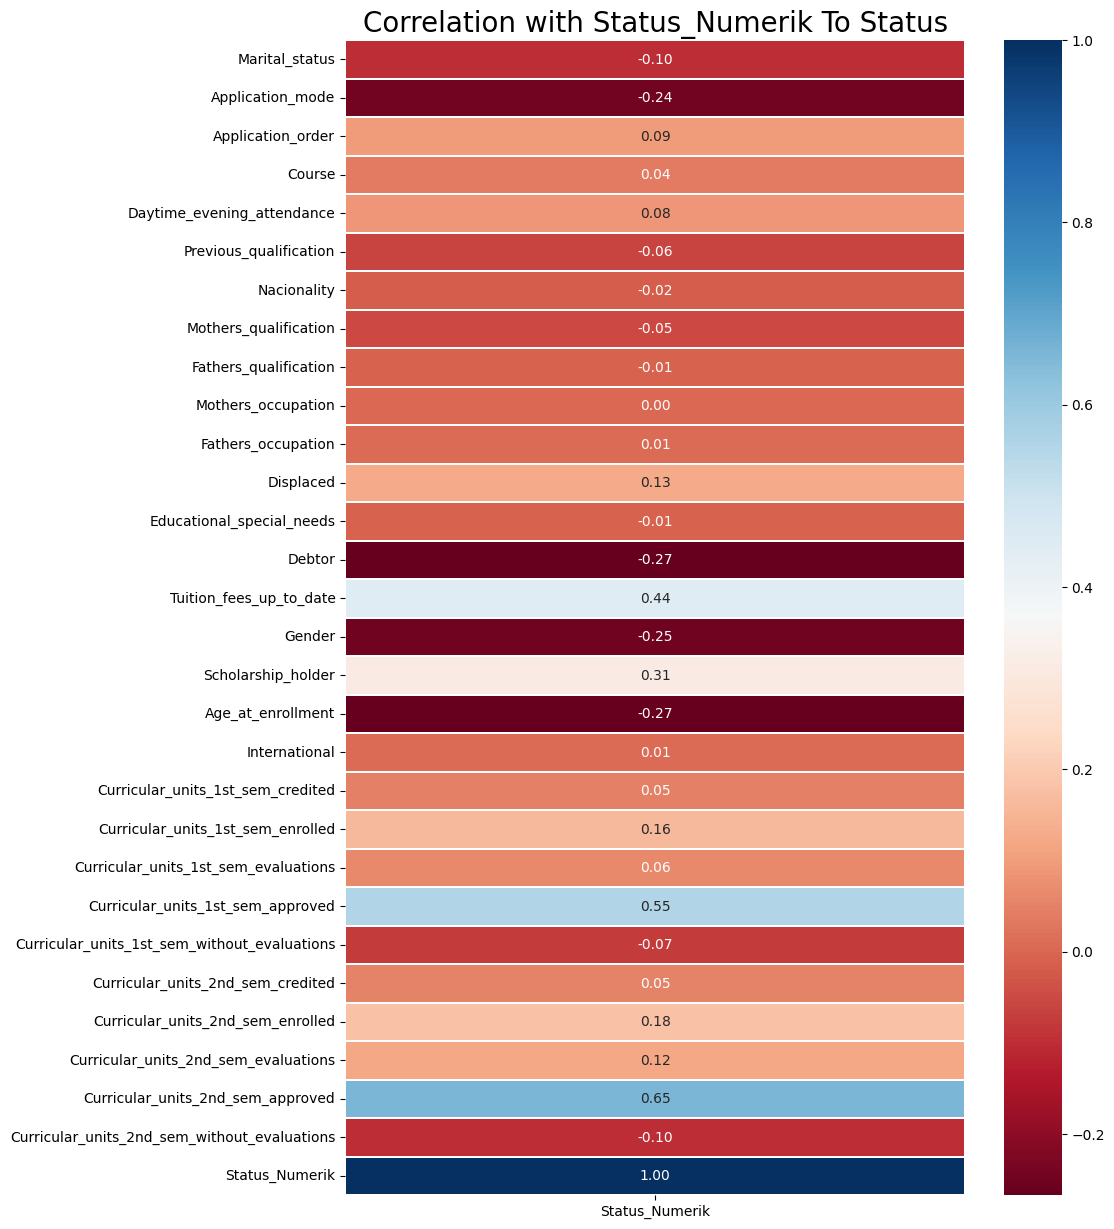

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi dan hanya mengambil kolom terakhir (Status_Numerik)
corr_last = df[['Marital_status', 'Application_mode', 'Application_order', 'Course',
                'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
                'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
                'Fathers_occupation', 'Displaced', 'Educational_special_needs',
                'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
                'Age_at_enrollment', 'International',
                'Curricular_units_1st_sem_credited',
                'Curricular_units_1st_sem_enrolled',
                'Curricular_units_1st_sem_evaluations',
                'Curricular_units_1st_sem_approved',
                'Curricular_units_1st_sem_without_evaluations',
                'Curricular_units_2nd_sem_credited',
                'Curricular_units_2nd_sem_enrolled',
                'Curricular_units_2nd_sem_evaluations',
                'Curricular_units_2nd_sem_approved',
                'Curricular_units_2nd_sem_without_evaluations', 'Status_Numerik']].corr()

# Hanya memilih korelasi dengan 'Status_Numerik' dan membuat DataFrame 1D
corr_last = corr_last[['Status_Numerik']].T

# Plot heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(corr_last.T, annot=True, annot_kws={'fontsize': 10}, cmap='RdBu', linewidth=0.3, fmt='.2f')
plt.title('Correlation with Status_Numerik To Status', fontsize=20)
plt.show()

Setelah diuji hubungan korelasi, yang memiliki pengaruh cukup besar terhadap status mahasiswa ialah umur dan yang langsung berhubungan dengan pelajaran seperti jumlah semester (baik evaluasi, enroll dan kredit). Hal ini bisa menunjukkan pembentukan motivasi memiliki karakteristik yang berbeda.


Selanjutnya melakukan preprocessing dengan metode yang digunakan
* Normalisasi : Untuk normalisasi sendiri akan menguji penggabungan jenis 2 metode yaitu untuk data yang bersifat kontinus akan memanfaatkan z-score dan yang bersifat diskrit akan memanfaatkan min-max
* Label Encoder
* Feature Selection LASSO
* Split Data
* SMOTE

# Data Preparation

In [17]:
df.drop("Status_Numerik", axis=1, inplace=True)

In [18]:
df = df.reset_index(drop=True)
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   int64  
 8   Mothers_qualification                         3630 non-null   int64  
 9   Fathers_qualification                         3630 non-null   i

## Normalisasi

In [20]:
norm_scaler_zsocre = StandardScaler()
norm_scaler_minmax = MinMaxScaler()

df[df.select_dtypes(include="float").columns] = norm_scaler_zsocre.fit_transform(df[
    df.select_dtypes(include="float").columns])

df[df.select_dtypes(include="integer").columns] = norm_scaler_minmax.fit_transform(df[
    df.select_dtypes(include="integer").columns])

## Label Encoder

In [21]:
encode = LabelEncoder()
df['Status'] = encode.fit_transform(df['Status'])
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,0.0,0.285714,0.833333,0.013858,1.0,0.0,-0.825034,0.0,0.418605,0.255814,...,0.0,0.00000,0.000000,0.00,-1.831085,0.0,-0.311312,0.121615,0.774119,0
1,0.0,0.250000,0.166667,0.925989,1.0,0.0,2.045805,0.0,0.000000,0.046512,...,0.0,0.26087,0.181818,0.30,0.662383,0.0,0.850919,-1.106070,0.353704,1
2,0.0,0.000000,0.833333,0.907512,1.0,0.0,-0.825034,0.0,0.837209,0.837209,...,0.0,0.26087,0.000000,0.00,-1.831085,0.0,-0.311312,0.121615,0.774119,0
3,0.0,0.285714,0.333333,0.978108,1.0,0.0,-0.825034,0.0,0.860465,0.837209,...,0.0,0.26087,0.303030,0.25,0.431281,0.0,-0.836191,-1.467154,-1.376634,1
4,0.2,0.678571,0.166667,0.801466,0.0,0.0,-2.487099,0.0,0.837209,0.860465,...,0.0,0.26087,0.181818,0.30,0.540750,0.0,0.850919,-1.106070,0.353704,1


## Feature Selection LASSO

In [22]:
lasso = Lasso(alpha = 0.05, max_iter = 100, fit_intercept = False, positive = True)
lasso.fit(df.iloc[:,:-1], df.iloc[:,-1])

coeff = DataFrame(df.iloc[:,:-1].columns)
coeff['Coefficient Estimate'] = Series(lasso.coef_)
coeff = coeff.sort_values(by = "Coefficient Estimate", ascending=False).reset_index(drop=True)
coeff.rename(columns={0:"Features"}, inplace= True)
coeff

,Features,Coefficient Estimate
0,Tuition_fees_up_to_date,0.491746
1,Curricular_units_2nd_sem_grade,0.188595
2,Daytime_evening_attendance,0.130710
3,Scholarship_holder,0.011512
4,Curricular_units_1st_sem_without_evaluations,0.000000
5,Curricular_units_1st_sem_credited,0.000000
6,Curricular_units_1st_sem_enrolled,0.000000
7,Curricular_units_1st_sem_evaluations,0.000000
8,Curricular_units_1st_sem_approved,0.000000
9,Curricular_units_1st_sem_grade,0.000000


In [23]:
df_fs = df[coeff["Features"][:4].values].reset_index(drop = True)
df_fs["Status"] = df["Status"]
df_fs

,Tuition_fees_up_to_date,Curricular_units_2nd_sem_grade,Daytime_evening_attendance,Scholarship_holder,Status
0,1.0,-1.831085,1.0,0.0,0
1,0.0,0.662383,1.0,0.0,1
2,0.0,-1.831085,1.0,0.0,0
3,1.0,0.431281,1.0,0.0,1
4,1.0,0.540750,0.0,0.0,1
...,...,...,...,...,...
3625,1.0,0.479934,1.0,0.0,1
3626,0.0,0.175852,1.0,0.0,0
3627,1.0,0.631975,1.0,1.0,0
3628,1.0,0.358301,1.0,1.0,1


## Split Data

In [24]:
X = df_fs.iloc[:,:-1]
y = df_fs.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)
X_train

,Tuition_fees_up_to_date,Curricular_units_2nd_sem_grade,Daytime_evening_attendance,Scholarship_holder
929,0.0,-1.831085,1.0,0.0
3587,1.0,-1.831085,1.0,0.0
3586,1.0,0.891964,1.0,0.0
2344,1.0,0.796179,0.0,0.0
1352,1.0,-1.831085,1.0,0.0
...,...,...,...,...
1130,0.0,-1.831085,1.0,0.0
1294,1.0,0.586134,1.0,0.0
860,1.0,0.571158,1.0,0.0
3507,1.0,0.966464,1.0,1.0


## SMOTE

In [25]:
y_train.value_counts()

Status
1    1760
0    1144
Name: count, dtype: int64

In [26]:
model_smote = SMOTE(sampling_strategy='minority', random_state = 42)
X_train, y_train = model_smote.fit_resample(X_train, y_train)
y_train.value_counts()

Status
0    1760
1    1760
Name: count, dtype: int64

# Modeling

In [27]:
clf = SVC(kernel = "rbf", gamma = 1, C = 10)
clf.fit(X_train, y_train)

SVC(C=10, gamma=1)

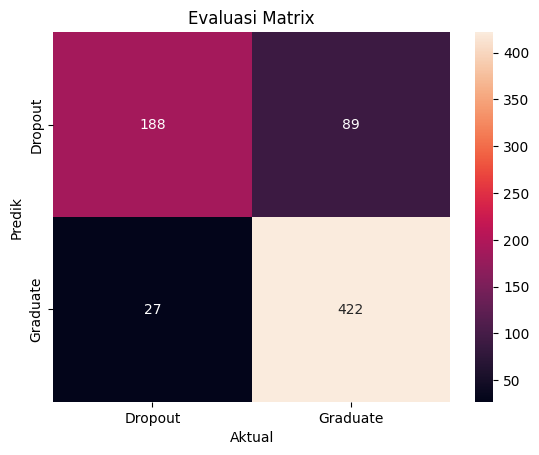

Accuracy   = 84.02 %
Precission = 82.58 %
Recall     = 93.99 %
F1-Score   = 87.92 %


In [28]:
predict = clf.predict(X_test)

cf = confusion_matrix(y_test, predict, labels=[0,1])
class_label = encode.classes_
frame_cf = pd.DataFrame(cf, index = class_label, columns = class_label)

sns.heatmap(frame_cf, annot=True, fmt = "d")
plt.title("Evaluasi Matrix")
plt.xlabel("Aktual")
plt.ylabel("Predik")
plt.show()

accuracy   = round(accuracy_score(y_test, predict)*100, 2)
precission = round(precision_score(y_test, predict)*100, 2)
recall     = round(recall_score(y_test, predict)*100, 2)
fscore     = round(f1_score(y_test, predict)*100, 2)

print('Accuracy   =', accuracy,'%')
print('Precission =', precission,'%')
print('Recall     =', recall,'%')
print('F1-Score   =', fscore,'%')

In [29]:
joblib.dump(clf, "model.pkl")

['model.pkl']

In [30]:
df.to_csv("data_baru.csv")